### The following program was developed by Skyler Chuaff and Jake LaPorte. The purpose of the program is to load a database of MMTT response data and fill in missing values at time points. To use this program for your data make the changes in the indicated spots. Please email diana.thomas@westpoint.edu if you have any questions.

In [1]:
#Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read in your data as a csv file. The response curve dataset must be in wide-view form with one subject identifier column followed by the measurements at time points. The data must be read in the form described below.
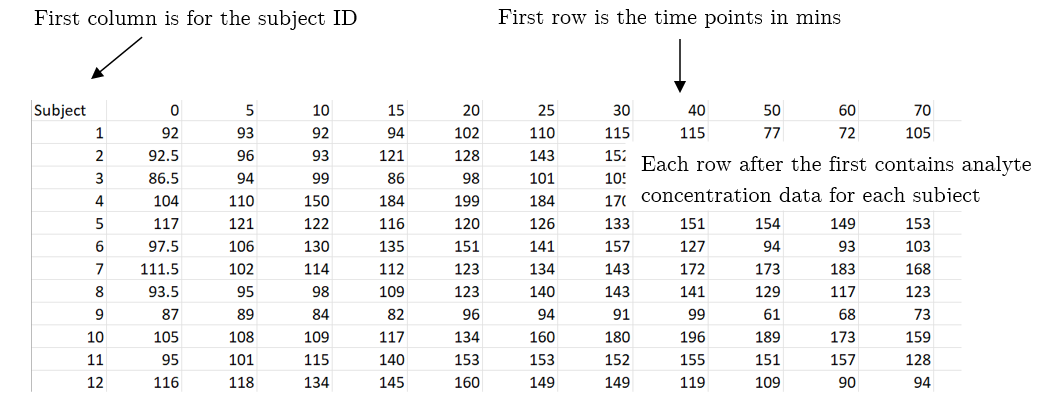

In addition, the time points need to be changed to match the time points for your study.
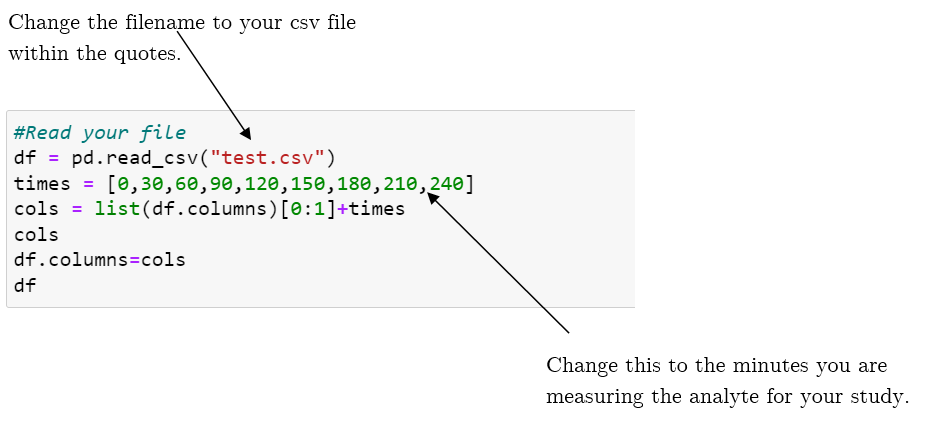


In [13]:
#Read your file
df = pd.read_csv("test.csv")
times = [0,30,60,90,120,150,180,210,240]
cols = list(df.columns)[0:1]+times
cols
df.columns=cols
df

,Subj,0,30,60,90,120,150,180,210,240
0,TOM_2102,87.04,93.01,83.25,95.87,111.68,69.92,92.75,93.29,95.58
1,TOM_2103,92.37,108.30,117.62,125.36,89.24,NaN,NaN,77.16,85.38
2,TOM_2104,95.62,103.80,116.30,131.42,129.66,126.87,87.50,75.84,80.80
3,TOM_2105,77.13,101.55,76.29,74.26,74.65,76.32,77.99,83.14,83.59
4,TOM_2106,78.33,81.01,93.12,83.45,92.63,78.42,82.07,74.78,76.52
5,TOM_2107,NaN,99.00,113.28,121.28,120.74,110.20,85.41,93.98,95.99
6,TOM_2108,90.55,87.69,83.90,78.52,83.46,73.70,73.87,92.05,84.90
7,TOM_2110,117.86,154.76,93.28,109.62,104.39,83.47,94.52,86.78,84.72
8,TOM_2111,83.97,81.78,61.49,71.04,77.56,60.26,70.25,80.71,86.50
9,TOM_2112,97.43,85.78,77.33,87.10,100.90,79.97,74.00,82.52,90.36


In [6]:
#The next few code chunks are the functions that implement the algorithm.
def fix_middle_1(left,right):
    """
    fix_middle_1 >>> the equation for calculating a missing value when there is
                     only 1 consecutive number missing.
    Input: left >>> the number associated with the smaller temporal value 
           right >>> the number associated with the larger temporal value
    Output: this function returns the simple average between the two numbers.
    """
    return (left+right)/2

In [7]:
def fix_middle_2(left,right):
    """
    fix_middle_2 >>> the equation for calculating a missing value when there are
                     2 consecutive numbers missing.
    Input: left >>> the number associated with the smaller temporal value 
           right >>> the number associated with the larger temporal value
    Output: this function returns a list of two numbers each 1/3 of the distance
            the next number.
    """
    interval = right-left
    num1 = left+interval/3
    num2 = num1+interval/3
    return [num1,num2]

In [8]:
def fix_end_1(col_1_y,col_2_y,col_x,col_1_x,col_2_x):
    m = (col_2_y - col_1_y)/(col_2_x - col_1_x)
    b = (col_2_y - (m*col_2_x))
    y3 = (m*col_x)+b
    return y3

In [9]:
#need to delete row if the output is negative

def fix_end_2(col_x_right,col_x_left,col_x_1,col_x_2,col_y_1,col_y_2): #coded for left
    m = (col_y_2 - col_y_1)/(col_x_2 - col_x_1)
    b = (col_y_1 - (m *col_x_1))
    col_y_left = (m*col_x_left)+b
    col_y_right = (m*col_x_right)+b
    return (col_y_left,col_y_right)

In [10]:
def row_imputer(series,admin_cols=2):
    """
    row_imputer - returns a vector/array of values where the index is the 
                      number of missing 
    
    """
    #pulls out info from series...x/y values
    data = series.iloc[admin_cols:].values
    cols = list(series.index[admin_cols:])

    
    #N is the length of the data
    N = len(data)
    
    #make an array of zeroes of length N
    #counter = np.zeros(N)
    
    #set the counter equal to zero
    cnt = 0 
    
    #returns first the index, then the data value
    for idx,d in enumerate(data):
        
        #if there is an NA value, add 1 to the cnt
        if np.isnan(d):
            cnt+=1
            
            #if one missing and the end is on the right
            if cnt==1 and idx == N-1:                          
                col_y = data[idx] #the y value to predict
                col_1_y = data[idx-1] #one to the left
                col_2_y = data[idx-2] #two to the left
                col_x = cols[idx] #x value
                col_1_x = cols[idx-1] #x value one to the left 
                col_2_x = cols[idx-2] #x value two to the left

                data[idx] = fix_end_1(col_1_y,col_2_y,col_x,col_1_x,col_2_x)

                series1 = pd.Series(data,index = cols)
                series2 = series.drop(labels = series.index[admin_cols:])
                series = pd.concat([series2,series1])

                
            #if two missing and the end is on the right
            if cnt == 2 and idx == N-1:                         
                col_y_right = data[idx]
                col_y_left = data[idx-1]
                col_y_1 = data[idx-2]
                col_y_2 = data[idx-3]
                col_x_right = cols[idx]
                col_x_left = cols[idx-1]
                col_x_1 = cols[idx-2]
                col_x_2 = cols[idx-3]
                
                vals = fix_end_2(col_x_right,col_x_left,col_x_1,col_x_2,col_y_1,col_y_2)
                i1=idx-1
                i2=idx
                data[i1]=vals[0]
                data[i2]=vals[1]

                series1 = pd.Series(data,index = cols)
                series2 = series.drop(labels = series.index[admin_cols:])
                series = pd.concat([series2,series1])

        #if there is not an NA value...check to see if 
        #something needs to be imputed (ie cnt>0)
        else:            
            
            ## if one missing from left
            if cnt == 1 and idx == 1:
                col_1_y = data[idx]
                col_2_y = data[idx+1]
                col_x = cols[idx-1]
                col_1_x = cols[idx]
                col_2_x = cols[idx+1]
                
                data[idx-1] = fix_end_1(col_1_y,col_2_y,col_x,col_1_x,col_2_x)
                
                series1 = pd.Series(data,index = cols)
                series2 = series.drop(labels = series.index[admin_cols:])
                series = pd.concat([series2,series1])

            #if two missing from left end
            if cnt == 2 and idx == 2:
            
                col_x_left = cols[idx-2]
                col_x_right = cols[idx-1]
                
                col_x_1 = cols[idx]
                col_x_2 = cols[idx+1]
                
                col_y_1= data[idx]
                col_y_2 = data[idx+1]
                
                vals = fix_end_2(col_x_right,col_x_left,col_x_1,col_x_2,col_y_1,col_y_2)
                data[idx-2]=vals[0]
                data[idx-1]=vals[1]
                
                series1 = pd.Series(data,index = cols)
                series2 = series.drop(labels = series.index[admin_cols:])
                series = pd.concat([series2,series1])

                            
            #if missing one data from the middle  
            if cnt == 1 and idx>1 and idx<N: 
                left = data[idx-2]
                right = data[idx]
                
                data[idx-1] = fix_middle_1(left,right)
                
                series1 = pd.Series(data,index = cols)
                series2 = series.drop(labels = series.index[admin_cols:])
                series = pd.concat([series2,series1])

                
            #if missing 2 consecutive from middle
            if cnt == 2 and idx>2 and idx<N:
                
                left = data[idx-3]
                right = data[idx]
                
                #the value to fill in (calls fix_middle_2 function)
                vals = fix_middle_2(left,right)
                data[idx-1] = vals[1]
                data[idx-2] = vals[0]
                
                series1 = pd.Series(data,index = cols)
                series2 = series.drop(labels = series.index[admin_cols:])
                series = pd.concat([series2,series1])
                
            if cnt >= 200:
                return False

            cnt = 0
    return series


In [11]:
#sniff check

row_imputer(df.iloc[6])

Subj    TOM_2108
0          90.55
30         87.69
60          83.9
90         78.52
120        83.46
150         73.7
180        73.87
210        92.05
240         84.9
Name: 6, dtype: object

In [19]:
def impute_dataframe(df,times,admin_cols=2):
    cols = list(df.columns)[0:admin_cols]+times
    df.columns=cols
    for i in range(len(df)-1,-1,-1):
        #### The issue was here, we didn't put the new number of admin cols on this one.
        series = row_imputer(df.iloc[i],admin_cols) ##################
        if isinstance(series,bool):
            df=df.drop(i)
        else:
            df.iloc[i] = series
    return df

In [20]:
admin_cols = 1
df=impute_dataframe(df,times,admin_cols)

In [21]:
df.to_csv('Missing Values Simulated.csv')

In [22]:
df

,Subj,0,30,60,90,120,150,180,210,240
0,TOM_2102,87.04,93.01,83.25,95.87,111.68,69.920000,92.750000,93.29,95.58
1,TOM_2103,92.37,108.30,117.62,125.36,89.24,85.213333,81.186667,77.16,85.38
2,TOM_2104,95.62,103.80,116.30,131.42,129.66,126.870000,87.500000,75.84,80.80
3,TOM_2105,77.13,101.55,76.29,74.26,74.65,76.320000,77.990000,83.14,83.59
4,TOM_2106,78.33,81.01,93.12,83.45,92.63,78.420000,82.070000,74.78,76.52
5,TOM_2107,84.72,99.00,113.28,121.28,120.74,110.200000,85.410000,93.98,95.99
6,TOM_2108,90.55,87.69,83.90,78.52,83.46,73.700000,73.870000,92.05,84.90
7,TOM_2110,117.86,154.76,93.28,109.62,104.39,83.470000,94.520000,86.78,84.72
8,TOM_2111,83.97,81.78,61.49,71.04,77.56,60.260000,70.250000,80.71,86.50
9,TOM_2112,97.43,85.78,77.33,87.10,100.90,79.970000,74.000000,82.52,90.36
